In [7]:
from qutip import *
from qutip.operators import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from cython import *

In [8]:
Ec = 1e8
Ej = 1e7
N_states = 50
ng_steps = 300

#

def projector(N,n,m):
    # |m><n| operator
    a = np.zeros((N,N),dtype = np.float64)
    if(n >= N or n < 0 or m >= N or m < 0):
        return Qobj(a)
    a[n,m] = 1
    return Qobj(a)
#
def projector_pm(N,n,m):
    a = np.zeros((2*N+1,2*N+1),dtype = np.float64)
    if(n > N or n < -N or m > N or m < -N):
        return Qobj(a)
    a[N+n,N+m] = 1
    return Qobj(a)

#
def num_pm(N):
    return num(2*N+1, offset = -N)    
def zero_pm(N):
    return num_pm(N)*0

In [9]:
N_s = 4
Hj = num(N_s)*0
for n in range(0,N_s):
    Hj = Hj +(projector(N_s,n,n+1) + projector(N_s,n+1,n))


In [68]:
Ec = 1
Ej = 100
print(N_states)
n = num_pm(N_states)
ng = 0
Hc = Ec*(n-ng)**2

eigs = np.zeros((ng_steps,2*N_states+1), dtype=np.float)
ng_space = np.linspace(-3,3,ng_steps)
Hj = zero_pm(N_states)
for n in range(-N_states,N_states+1):
    Hj = Hj - 0.5*Ej*(projector_pm(N_states,n,n+1) + projector_pm(N_states,n+1,n))
H = Hj + Hc
#print(Hj)
#print(Hc)
n = num_pm(N_states)
for ng_id, ng in enumerate(ng_space):
    Hc = Ec*(n-ng)**2
    H = Hc + Hj
    eigs[ng_id,:] = H.eigenenergies()

g = min(eigs[:,0])
eigs = eigs - g
Hc = Ec*(n)**2
H = Hc + Hj
waves = H.eigenstates()[1]
print((H.eigenenergies()[1]-H.eigenenergies()[0])/Ec)
#0 is for eigenvalues
#for x_id, x in enumerate(waves[0]):
#    print(str(x_id) + ' ' + str(x[0][0]))
#print(waves[0][N_states][0][0])

50
13.887496894


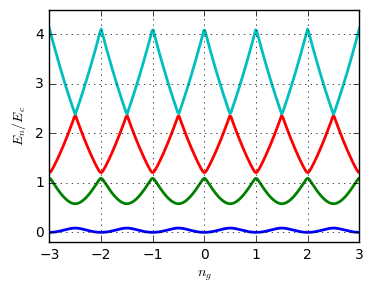

In [49]:
fig = plt.figure(figsize=(4,3),dpi=600)
charge = fig.add_subplot(111)
#charge.set_title(r'Зарядовый кубит $E_j/E_c = 0.1$'+'\n')
charge.set_xlabel(r'$n_g$')
charge.set_ylabel(r'$E_n/E_c$')
charge.plot(ng_space,eigs[:,0:4]/Ec,linewidth = 2)
charge.grid()
charge.set_ylim([-0.2,4.5])
plt.savefig("charge_qubit_05.pdf",bbox_inches="tight")

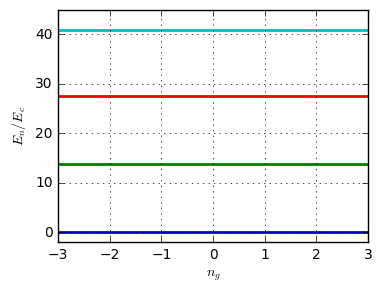

In [34]:
fig = plt.figure(figsize=(4,3),dpi=600)
charge = fig.add_subplot(111)
#charge.set_title(r'Зарядовый кубит $E_j/E_c = 0.1$'+'\n')
charge.set_xlabel(r'$n_g$')
charge.set_ylabel(r'$E_n/E_c$')
charge.plot(ng_space,eigs[:,0:4]/Ec,linewidth = 2)
charge.grid()
charge.set_ylim([-2,45])
plt.savefig("transmon_100.pdf",bbox_inches="tight")

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


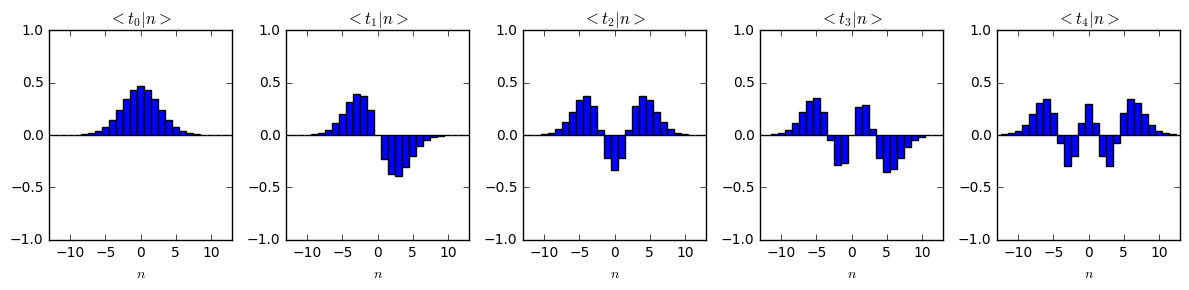

In [71]:
fig = plt.figure(figsize=(12,3),dpi=300)
func = [0 for x in range(0,5)]
for j in range(0,num_of_funcs):
    func[j] = fig.add_subplot(1,len(func),1+j)
    #func[j].set_title(str(j)+'\n')
    func[j].set_xlabel(r'$n$')
    func[j].set_title(r'$<t_'+str(j)+'|n>$')
    
    #print(w[N_states-2:N_states+9])
    #func[j].bar(tuple([z for z in range(-2,8+1)]),tuple(w[N_states-2:N_states+9]),1)
    func[j].bar(list(range(-N_states, N_states+1)), [np.real(x[0][0]) for x in (waves[j])],1, align= 'center')
    #func[j].bar(list(range(-N_states, N_states+1)), [np.imag(x[0][0]) for x in (waves[j])],1, align= 'center')
    func[j].set_ylim([-1,1])
    func[j].set_xlim([-13,13])
fig.tight_layout()
fig.show()
#plt.savefig("charge_eigenstates.pdf",bbox_inches="tight")
plt.savefig("transmon_eigenstates.pdf",bbox_inches="tight")
    #funcs.legend(bbox_to_anchor = [0,1], loc = "upper left")

/usr/lib/python3/dist-packages/matplotlib/figure.py:372: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


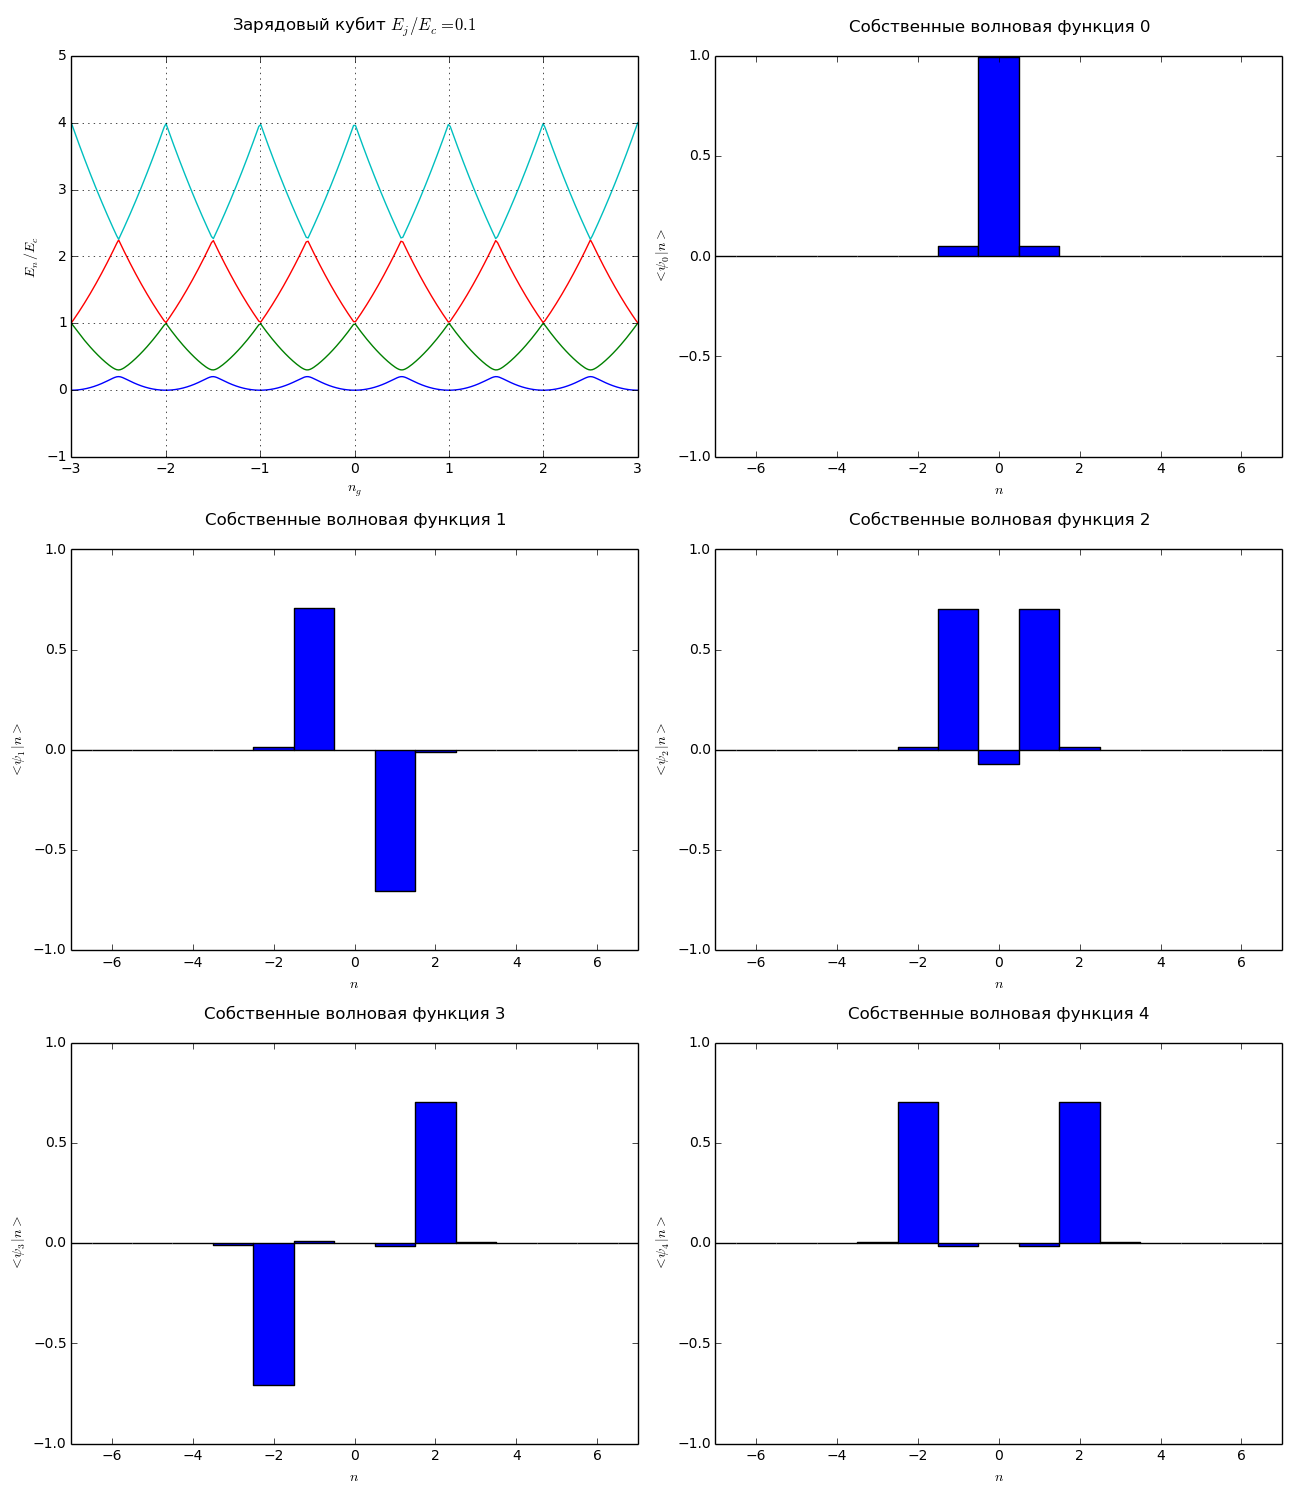

In [4]:
m = 2
num_of_funcs = 2*m + 1
fig = plt.figure(figsize=(13,5*(m+1)),dpi=300)
charge = fig.add_subplot(m+1,2,1)
charge.set_title(r'Зарядовый кубит $E_j/E_c = 0.1$'+'\n')
charge.set_xlabel(r'$n_g$')
charge.set_ylabel(r'$E_n/E_c$')
charge.plot(ng_space,eigs[:,0:4]/Ec)
charge.grid()
func = [0 for x in range(0,num_of_funcs)]
for j in range(0,num_of_funcs):
    func[j] = fig.add_subplot(m+1,2,2+j)
    func[j].set_title(r'Собственные волновая функция '+str(j)+'\n')
    func[j].set_xlabel(r'$n$')
    func[j].set_ylabel(r'$<\psi_'+str(j)+'|n>$')
    
    w = [np.real(x[0][0]) for x in (waves[j])]
    #print(w[N_states-2:N_states+9])
    #func[j].bar(tuple([z for z in range(-2,8+1)]),tuple(w[N_states-2:N_states+9]),1)
    func[j].bar([z for z in range(-N_states, N_states+1)], w,1, align= 'center')
    func[j].set_ylim([-1,1])
    func[j].set_xlim([-7,7])
fig.tight_layout()
fig.show()
    #funcs.legend(bbox_to_anchor = [0,1], loc = "upper left")

50


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


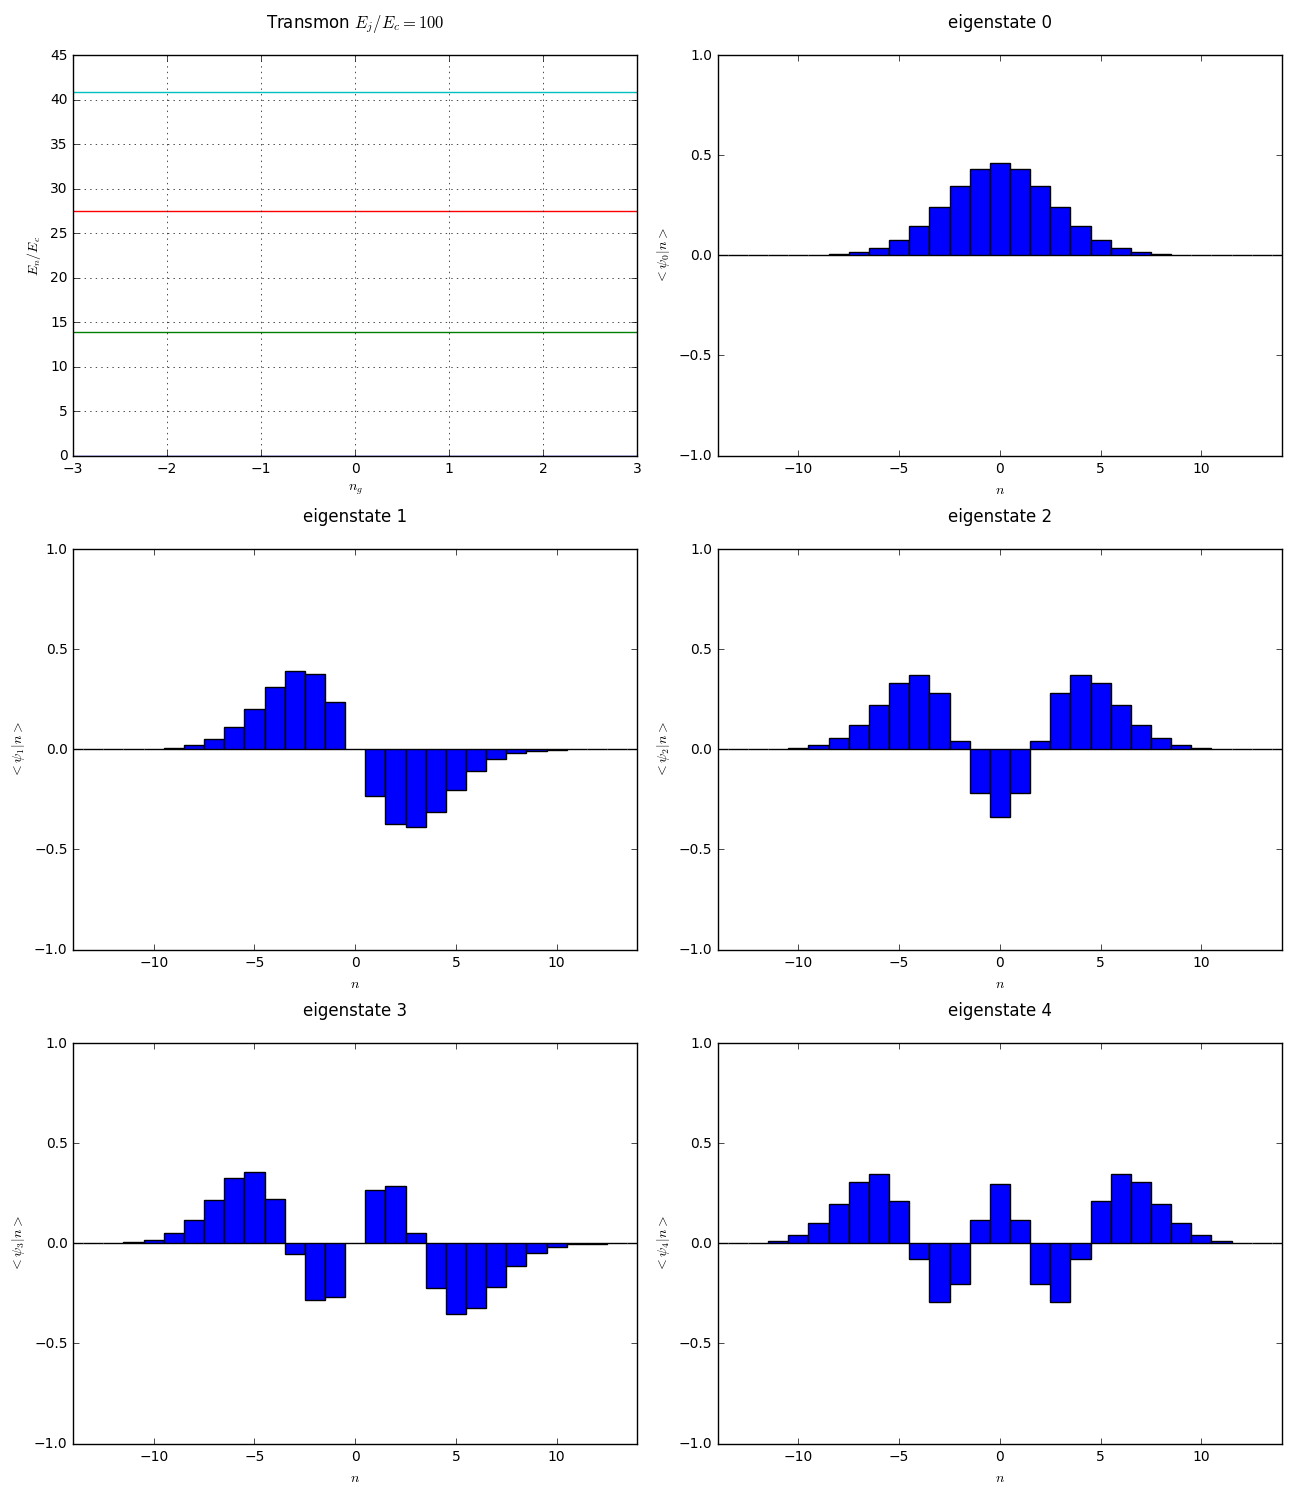

In [46]:
m = 2
num_of_funcs = 2*m + 1
fig = plt.figure(figsize=(13,5*(m+1)),dpi=300)
charge = fig.add_subplot(m+1,2,1)
charge.set_title(r'Transmon $E_j/E_c = %d$'%(Ej/Ec)+'\n')
charge.set_xlabel(r'$n_g$')
charge.set_ylabel(r'$E_n/E_c$')
charge.plot(ng_space,eigs[:,0:4]/Ec)
charge.grid()
func = [0 for x in range(0,num_of_funcs)]
print(N_states)
for j in range(0,num_of_funcs):
    func[j] = fig.add_subplot(m+1,2,2+j)
    func[j].set_title(r'eigenstate '+str(j)+'\n')
    func[j].set_xlabel(r'$n$')
    func[j].set_ylabel(r'$<\psi_'+str(j)+'|n>$')
    
    w = [np.real(x[0][0]) for x in (waves[j])]
    #print(w[N_states-2:N_states+9])
    func[j].bar([z for z in range(-N_states, N_states+1)], w,1, align= 'center')
    func[j].set_ylim([-1,1])
    func[j].set_xlim([-14,14])
    #funcs.legend(bbox_to_anchor = [0,1], loc = "upper left")
fig.tight_layout()
fig.show()
plt.savefig("transmon-oh-shit.pdf",bbox_inches="tight")

In [21]:
Ec = 1e8
Ej = 2.5e8
n = num_pm(N_states)
ng = 0
Hc = Ec*(n-ng)**2

f = Ec
wa = 2*np.pi
Hj = zero_pm(N_states)
for n in range(-N_states,N_states+1):
    Hj = Hj - 0.5*Ej*(projector_pm(N_states,n,n+1) + projector_pm(N_states,n+1,n))
Hq = Hj + Hc

Hf = f * n
Hf_coeff_cython = "sin(t * w + phi)"
Args = {'w' : 1.5*wa, 'phi' : 0}

def Hf_coeff_python(t, args):
    return np.sin(t * args['w'] + args['phi'])

psi0 = basis(2*N_states+1,0)
tlist = np.linspace(0,50,100)

Quantum object: dims = [[101], [101]], shape = [101, 101], type = oper, isherm = True
Qobj data =
[[  2.50000000e+11  -1.25000000e+08   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -1.25000000e+08   2.40100000e+11  -1.25000000e+08 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00  -1.25000000e+08   2.30400000e+11 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   2.30400000e+11
   -1.25000000e+08   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,  -1.25000000e+08
    2.40100000e+11  -1.25000000e+08]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
   -1.25000000e+08   2.50000000e+11]]

In [11]:

c_op_list = []

gamma_relax = 0.04
gamma_dephase = 0.04


rate = gamma_relax
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * sigmam().dag())

rate = gamma_dephase/2
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * sigmaz())

In [18]:
%%time
H = [Hq, [Hf, Hf_coeff_cython]]
output = mesolve(H, psi0, tlist, c_op_list, [sigmam().dag()*sigmam()], args = Args)

TypeError: Incorrect hamiltonian specification

In [ ]:
%%time
H = [Hq, [Hf, Hf_coeff_python]]
output = mesolve(H, psi0, tlist, c_op_list, [sigmam().dag()*sigmam()], args = Args)

In [ ]:
fig, ax = plt.subplots(figsize=(13,5))
ax.plot(tlist, output.expect[0], label="Atom excited state")
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability')
ax.set_title('Rabi oscillations');